<a href="https://colab.research.google.com/github/Roopesh-J/DSCI_4850-MachineLearning-AssignmentThree/blob/main/Copy_of_Assignment3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 4850 / 6850 / DSCI 4850 - Assigment 3 - (400/450 points)

**Total points (400 undergraduate / 450 graduate)**

**Student Name: Roopesh Mikkilineni**

**Graduate**

## Instructions:

You are to make a copy of this notebook on your own Google Drive (if you don't have one, get one, it is free), and use the exact format provided. Any code needs to go in the code cells, and any 'text' answer/description needs to go in the proper text cell. We will not be looking for answers randomly placed so please read the instructions.

You are to use only the libraries provided in the next code cell. Any additional library is NOT allowed and will cause you to lose all the points that use said library's functions/functionality. You can use any functions given in the class code examples, but be very very careful of lifting anything 
'as-is' from the internet as it will be considerered plagiarism. 

**IMPORTANT: Make sure you use 1234 (for the folds use: 3456, 5678, 7890) for your randomseed/random states. Failure to do so will make your answers not comparable to the answer key and you will get a zero on the whole assignment.**

## Submission format:

The submission for Assignment two will have two components:

1) You are to create a PDF from the PRINT out of this notebook with all cells executed sequentially. It is the student's responsibility to be able to do this and no excuses will be accepted, no legible PDF = zero grade. So practice and test before submission time. This PDF should be named LastName_FirstName-Assignment3.PDF

2) The student should create a GitHub repository for this assignment and properly title the repository Class_CODE-ClassName-AssignmentTwo. This repository should have a readme file and the Google Colab notebook in it. Note that colab can save a copy directly to GitHub so make sure you test this. Downloading the notebook file and uploading it directly will result in 200 points deduction. The link to your GitHub repository should be included as text/message in the iCollege submission drop, failure to include this link will result in a 100 point penalty. 

## Extra Credit for all:

Any student can get 20 extra credit points by doing one simple thing:

1) Make sure your repo for this assignment has a nice README file with figures and results. 


In [1]:
############## These are the only imports allowed to solve this homework, so make sure you do not add anything else down below

%matplotlib inline

import numpy as np
import pandas as pd
import sklearn 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()


Using the Chess dataset from Kaggle: https://www.kaggle.com/datasets/datasnaek/chess

In [2]:
### Manually download it and upload to this istance data sample space
### Note DO NOT change these operations or all your answers will be incorrect

### Let's do some transformations and extra features on this.
df=pd.read_csv('games.csv', encoding='utf-8')

# Difference between white rating and black rating - independent variable
df['rating_difference']=df['white_rating']-df['black_rating']

# White wins flag (1=win vs. 0=not-win) - dependent (target) variable
df['white_win']=df['winner'].apply(lambda x: 1 if x=='white' else 0)


For this assignment we will be using two columns as features only, and the white_win colum as the label.

In [3]:
X=df[['rating_difference', 'turns']]
y=df['white_win'].values

# Question 1 (10 points)

Use sklearn to split this the data into testing and training data. 

In [4]:
##### Code block for Question 1
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Question 2 (30 points)

Manually (DO NOT use kFold or any built-in functionality) create **THREE** different folds for the training data. 

In [5]:
##### Code block for Question 2
fold1_X_train, fold1_X_test, fold1_y_train, fold1_y_test = train_test_split(X_train,y_train, test_size = 1/3, random_state=3456)
fold2_X_train, fold2_X_test, fold2_y_train, fold2_y_test = train_test_split(X_train,y_train, test_size = 1/3, random_state=5678)
fold3_X_train, fold3_X_test, fold3_y_train, fold3_y_test = train_test_split(X_train,y_train, test_size = 1/3, random_state=7890)

# Question 3 (30 points)

Create code to build three different SVM models with the following kernels:

1.   linear
2.   poly
3.   rbf

In [6]:
##### Code block for Question 3
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

linear = make_pipeline(StandardScaler(), SVC(kernel='linear'))
poly = SVC(kernel='poly')
rbf = SVC(kernel='rbf')

models={"Linear":linear,"Poly":poly,"RBF": rbf}

# Question 4 (70 points)

FOLD 1 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Linear:               precision    recall  f1-score   support

           0       0.64      0.67      0.65      2651
           1       0.66      0.62      0.64      2698

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



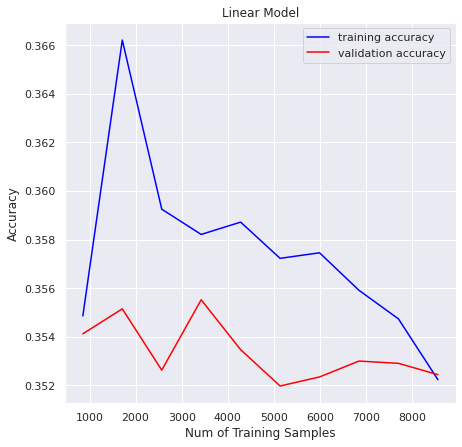



Poly:               precision    recall  f1-score   support

           0       0.74      0.26      0.39      2651
           1       0.56      0.91      0.69      2698

    accuracy                           0.59      5349
   macro avg       0.65      0.59      0.54      5349
weighted avg       0.65      0.59      0.54      5349



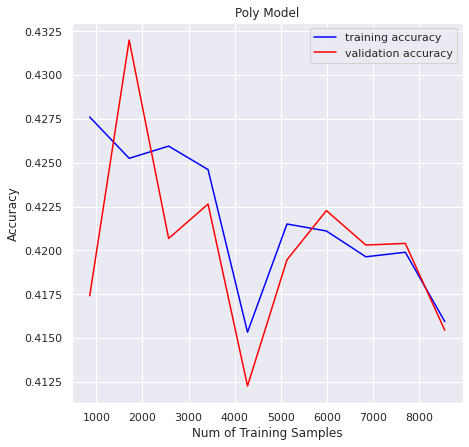



RBF:               precision    recall  f1-score   support

           0       0.64      0.67      0.65      2651
           1       0.66      0.62      0.64      2698

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



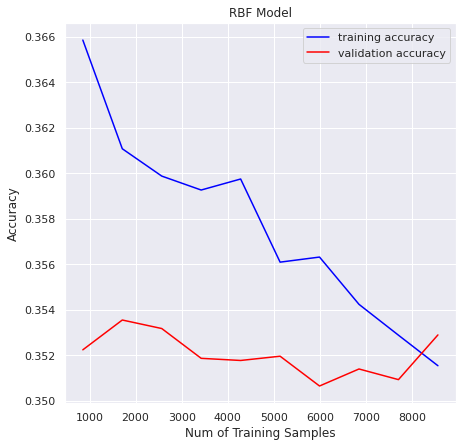

In [9]:
##### Code block for Question 4
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

train_sizes = [.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]

def plot_learning_curve(model,X,y,name,ts=train_sizes):
  train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=ts, scoring='neg_mean_squared_error')

  train_scores = -train_scores
  test_scores = -test_scores
  train_mean = np.mean(train_scores, axis=1)
  test_mean = np.mean(test_scores, axis=1)

  fig, ax = plt.subplots(figsize=(7,7))
  plt.plot(train_sizes, train_mean, color='blue', markersize=5, label='training accuracy')
  plt.plot(train_sizes, test_mean, color='red', markersize=5, label='validation accuracy')
  
  plt.xlabel('Num of Training Samples')
  plt.ylabel('Accuracy')
  plt.title(name + " Model")
  plt.legend(loc=0)
  plt.show()
  print('\n')

def model_evaluations(X_train, X_test, y_train, y_test, models=models):
  for name,model in models.items(): 
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name}: {classification_report(y_test, y_pred)}")
    plot_learning_curve(model,X_train,y_train,name)

model_evaluations(fold1_X_train, fold1_X_test, fold1_y_train, fold1_y_test)

Textual answer to question 4 goes here.

<u>Linear Model:</u> 
From the classification report for the linear model, it seems that precision and recall are close for both classes. This means that the model identifies both classes almost equally well but doesn't do better on any specific class. 

From the graph of the liner model, we can see the training accuracy and validation accuracy converge. This means that the generalization error decreases with more samples and that our model is performing well, however we have to be careful about overfitting. The two accuracy lines cross over, indicating that the model slightly overfits. 

<u>Poly Model:</u>
From the graph, it seems that the validation and training accuracy graphs do converge however they both cross over multiple times indicating a bad 'fit'. 

From the classification report, the precision for class 0 is much higher than it is for class 1 and the opposite is true for recall. This means that the model is better at indentifying class 1. 

<u>RBF Model:</u>
The RBF model graph is similar to the linear graph, it converges but overfits very slightly. 

The classification report for this model shows the f1-score for both classes to be close, this means that the model performance is balanced between precision and recall. Though this is misleading sicne the accuracy is .65, which is not very high. 

# Question 5 (70 points)

FOLD 2 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Linear:               precision    recall  f1-score   support

           0       0.65      0.67      0.66      2708
           1       0.65      0.64      0.64      2641

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



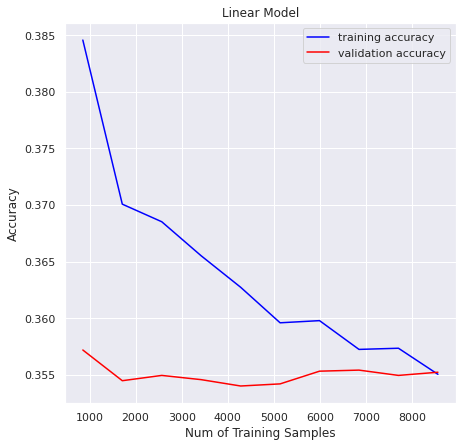



Poly:               precision    recall  f1-score   support

           0       0.77      0.23      0.35      2708
           1       0.54      0.93      0.68      2641

    accuracy                           0.57      5349
   macro avg       0.65      0.58      0.52      5349
weighted avg       0.65      0.57      0.51      5349



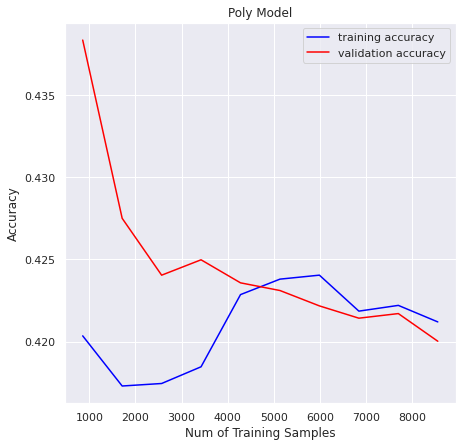



RBF:               precision    recall  f1-score   support

           0       0.65      0.66      0.66      2708
           1       0.65      0.64      0.64      2641

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



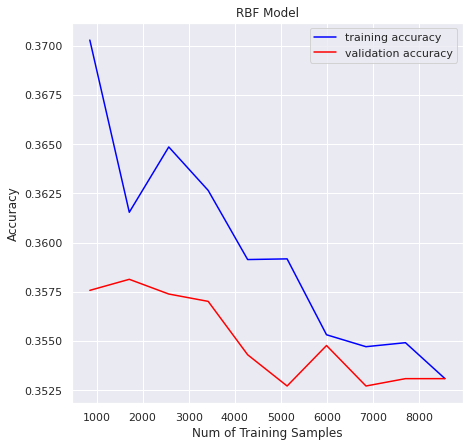

In [10]:
##### Code block for Question 5
model_evaluations(fold2_X_train, fold2_X_test, fold2_y_train, fold2_y_test)

Textual answer to question 5 goes here.

<u>Linear Model:</u> 

From the graph of the liner model, we can see the training accuracy and validation accuracy converge nearly perfectly. The lines don't crossover but but do appear to be touching. This still indicates some level of overfitting. 

<u>Poly Model:</u>

The model has higher precision but lower recall for class 0 and vice versa for class 1, indicating a possible difficulty in identifying class 0 and higher chance of false negatives for this class.

<u>RBF Model:</u>

Because the model has a similar precision and recall for both classes, this indicates a balanced performance. This means that the model isn't better on class or the other. 

# Question 6 (70 points)

FOLD 3 - run the first three models with first fold data you created. Output the classification report AND plot its learning curve.


In the text cell, following the code block, descibe what findings can be infered from the classification report and learning curve. Mention at least 3 non-trivial observations between the different kernels. 

Linear:               precision    recall  f1-score   support

           0       0.64      0.67      0.65      2684
           1       0.65      0.62      0.64      2665

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



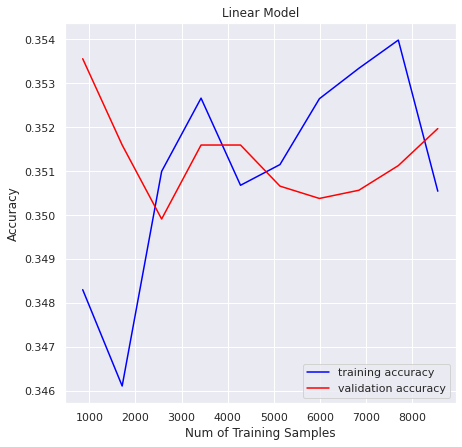



Poly:               precision    recall  f1-score   support

           0       0.74      0.24      0.36      2684
           1       0.54      0.91      0.68      2665

    accuracy                           0.58      5349
   macro avg       0.64      0.58      0.52      5349
weighted avg       0.64      0.58      0.52      5349



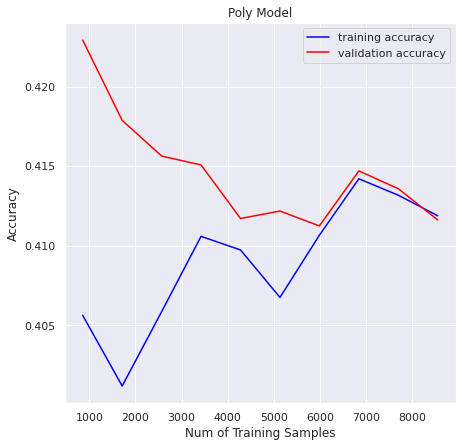



RBF:               precision    recall  f1-score   support

           0       0.64      0.66      0.65      2684
           1       0.64      0.62      0.63      2665

    accuracy                           0.64      5349
   macro avg       0.64      0.64      0.64      5349
weighted avg       0.64      0.64      0.64      5349



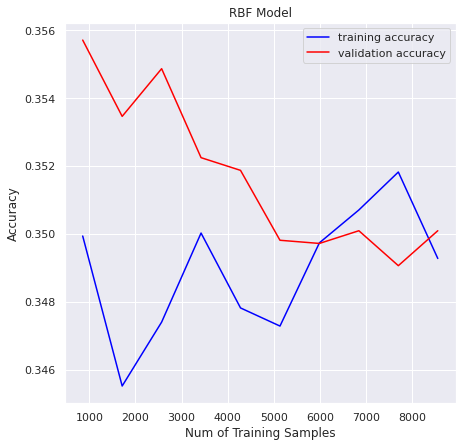

In [11]:
##### Code block for Question 6
model_evaluations(fold3_X_train, fold3_X_test, fold3_y_train, fold3_y_test)

Textual answer to question 6 goes here.

<u>Linear Model:</u> 

For both classe the precision and recall are similar, with class 0 having slightly lower precision and higher recall compared to class 1. This means that the model performance similarly for both classes, but has a slightly better recall for class 0.

<u>Poly Model:</u>

The model has high precision but low recall for class 0, which means it has some difficulty identifying instances class 0 and there is a higher chance of false negatives for it. On the other hand, the model has a lower precision but higher recall for class 1.

<u>RBF Model:</u>

Looking at the graph for this model, it is very obvious that the model is overfitting. In fact, we see it starting to oscillate between overfitting and underfitting. This means that the model will flip between the two fits as more and more data comes in. While it will still converge it is not a good way to train a model. 



# Question 7 (30 points)

From the three folds pick the best model for each different type of kernel.

Present a table with the following columns from their metrics and model. Remember to make classifications on the test set at this stage.

1. Model Name (Kernel)
2. Accuracy
3. Precision
4. Recall
5. F1-score
6. RMSE


In [22]:
##### Code block for Question 7
from sklearn.metrics import mean_squared_error

folds = [
    [fold1_X_train, fold1_X_test, fold1_y_train, fold1_y_test],
    [fold2_X_train, fold2_X_test, fold2_y_train, fold2_y_test],
    [fold3_X_train, fold3_X_test, fold3_y_train, fold3_y_test]]

metrics = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'RMSE'])

best_fold = {'Linear':2,'Poly':2,'RBF':3}

for name,model in models.items():
  specific_fold = folds[best_fold[name]-1]

  model.fit(specific_fold[0],specific_fold[2])
  y_pred = model.predict(specific_fold[1])

  cr = classification_report(specific_fold[3], y_pred, output_dict=True)
  metrics = metrics.append({
      'Model Name':name,
      'Accuracy':cr['accuracy'],
      'Precision':cr['weighted avg']['precision'],
      'Recall':cr['weighted avg']['recall'],
      'F1-score':cr['weighted avg']['f1-score'],
      'RMSE':np.sqrt(mean_squared_error(specific_fold[3], y_pred))
      }, ignore_index=True)

metrics = metrics.round(2)
metrics

<ipython-input-22-7c68f19dd1f9>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
<ipython-input-22-7c68f19dd1f9>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({
<ipython-input-22-7c68f19dd1f9>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics = metrics.append({


,Model Name,Accuracy,Precision,Recall,F1-score,RMSE
0,Linear,0.65,0.65,0.65,0.65,0.59
1,Poly,0.57,0.65,0.57,0.51,0.65
2,RBF,0.64,0.64,0.64,0.64,0.60


# Question 8 (40 points) 

From question 7, which one is the best model in the following contexts:

a) Metrics from table from question 7, and why?

b) Based on the learning curves ploted in the previous questions, and why?

Textual answer to question 8a goes here.

The linear model seems to be the best since it has the highest metrics (accuracy, precision, recall and f1-score) across the board and the lowest error. The lowest error means that this linear model is also overfitting the least which is very important. 

Textual answer to question 8b goes here.

Just by visual observation, the linear model fits nearly perfectly with Fold 2. The training accuracy and validation accuracy just barely touch but don't crossover, while this is not ideal and potentially dangerous if more data comes in, it also indicates a really lower generalization error. Another thing to consider is that overscaling the linear model, it runs considerable faster than the other model and is simpler overall. These 2 attribtues also make it a more appealing model to choose.

# Question 9 (50 points)

Wrie the simplest and most efficient Sklearn pipeline to do extactly what we did in questions 2 to 6. Make sure that you get all the same intermediate outputs and output the same table from question 7 directly from this pipeline.

Fold 1
----------------------
Linear:               precision    recall  f1-score   support

           0       0.64      0.67      0.65      2651
           1       0.66      0.62      0.64      2698

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



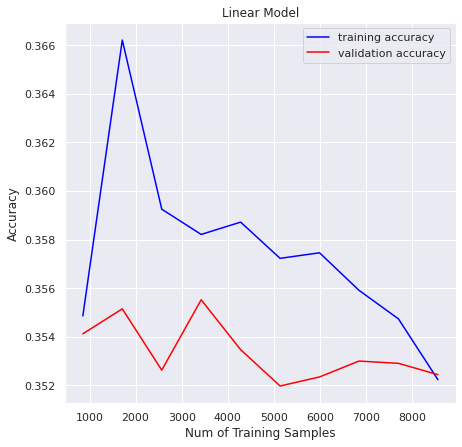



Poly:               precision    recall  f1-score   support

           0       0.74      0.26      0.39      2651
           1       0.56      0.91      0.69      2698

    accuracy                           0.59      5349
   macro avg       0.65      0.59      0.54      5349
weighted avg       0.65      0.59      0.54      5349



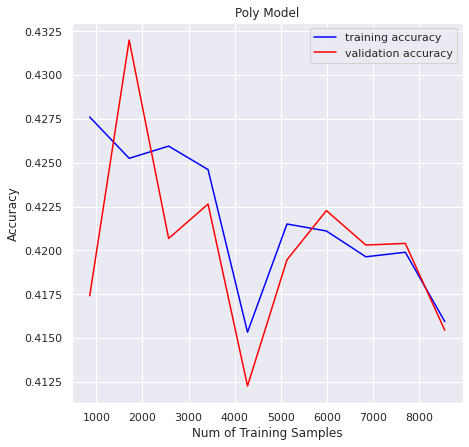



RBF:               precision    recall  f1-score   support

           0       0.64      0.67      0.65      2651
           1       0.66      0.62      0.64      2698

    accuracy                           0.65      5349
   macro avg       0.65      0.65      0.65      5349
weighted avg       0.65      0.65      0.65      5349



In [ ]:
##### Code block for Question 9
from sklearn.pipeline import Pipeline

folds = [
    [fold1_X_train, fold1_X_test, fold1_y_train, fold1_y_test],
    [fold2_X_train, fold2_X_test, fold2_y_train, fold2_y_test],
    [fold3_X_train, fold3_X_test, fold3_y_train, fold3_y_test]]

metrics = pd.DataFrame(columns=['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'RMSE'])
pipeline = Pipeline([('svm',None)])
for k,fold in enumerate(folds):
  print(f'Fold {k+1}\n----------------------')
  for name, model in models.items():
    pipeline.set_params(svm=model)
    pipeline.fit(fold[0],fold[2])

    y_pred = pipeline.predict(fold[1])
    print(f"{name}: {classification_report(fold[3], y_pred)}")

    if (name=='Linear' and k==1) or (name=='Poly' and k==1) or (name=='RBF' and k==2):
      cr = classification_report(fold[3], y_pred, output_dict=True)
      metrics = metrics.append({
          'Model Name':name,
          'Accuracy':cr['accuracy'],
          'Precision':cr['weighted avg']['precision'],
          'Recall':cr['weighted avg']['recall'],
          'F1-score':cr['weighted avg']['f1-score'],
          'RMSE':np.sqrt(mean_squared_error(fold[3], y_pred))
          }, ignore_index=True)

    plot_learning_curve(pipeline,fold[0],fold[2],name)

metrics = metrics.round(2)
metrics

# Graduate Student Question: (50 points)

Use the following function and provide visualizations for the best models for each kernel type from above (looking for three plots to receive full credit). Note: The function might need some small adjustments :)


In [ ]:
def Plot_3D(X, X_test, y_test, clf):
            
    # Specify a size of the mesh to be used
    mesh_size = 5
    margin = 1

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test['rating_difference'], y=X_test['turns'], z=y_test, 
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with SVM Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='SVM Prediction',
                              colorscale='RdBu', showscale=False, 
                              contours = {"z": {"show": True, "start": 0.2, "end": 0.8, "size": 0.05}}))
    fig.show()

In [ ]:
##### Code block for Graduate Student Question - Figure 1

In [ ]:
##### Code block for Graduate Student Question - Figure 2

In [ ]:
##### Code block for Graduate Student Question - Figure 3